# Example 2: Creating a Normal Probability Distribution 

# Installing the necessary libraries

In [8]:
pip install amazon-braket-sdk

Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from braket.circuits import Circuit
from braket.aws import AwsDevice
import math

# AWS Braket setup

In [13]:
device_arn = "arn:aws:braket:::device/quantum-simulator/amazon/sv1"

# Create a circuit to generate random numbers

In [14]:
# Number of qubits
n_qubits = 5
# Number of samples
n_samples = 1000 
# Apply Hadamard gate to all qubits
circuit = Circuit().h(range(n_qubits))  

# Run the circuit


In [15]:
device = AwsDevice(device_arn)
task = device.run(circuit, shots=n_samples)
result = task.result()

# Extract random numbers from the quantum circuit output

In [16]:
bitstrings = result.measurements
random_numbers = [int(''.join(map(str, bits)), 2) for bits in bitstrings]

# Apply Box-Muller transformation to get a normal distribution

In [19]:
u1 = [x / (2**n_qubits - 1) for x in random_numbers]
u2 = np.random.uniform(0, 1, n_samples) 
# Generate additional random numbers for the transformation
z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

/tmp/ipykernel_28034/3981547595.py:4: RuntimeWarning: divide by zero encountered in log
  z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
/tmp/ipykernel_28034/3981547595.py:5: RuntimeWarning: divide by zero encountered in log
  z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)


# Plot the histogram of the normal distribution


ValueError: supplied range of [-inf, inf] is not finite

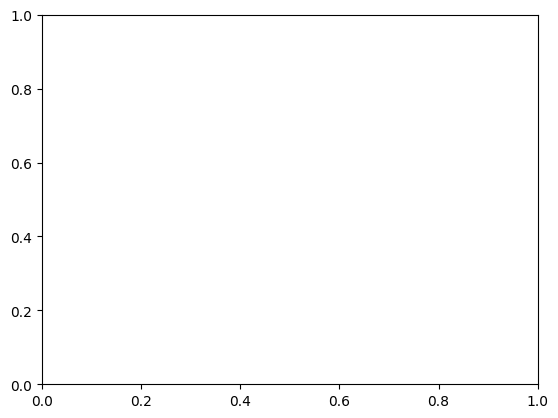

In [20]:
plt.hist(z0, bins=50, density=True, alpha=0.6, color='g')
plt.title('Normal Probability Distribution using AWS Braket')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()